# Exercise 1
 <p><div class="lev1"><a href="#Task-A.-Another-LEGO-brick-in-the-wall"><span class="toc-item-num">Task A.&nbsp;&nbsp;</span>Another LEGO brick in the wall</a></div>
 <p><div class="lev1"><a href="#Task-B.-Drop-the-Bike"><span class="toc-item-num">Task B.&nbsp;&nbsp;</span>Drop the Bike</a></div>

In [1]:
# Add your imports here
% pylab inline
import pandas as pd
import glob
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [2]:
DATA_FOLDER = 'data'

## Task A. Another LEGO brick in the wall

LEGO is a popular brand of toy building bricks. They are often sold in sets in order to build a specific object. Each set contains a number of parts in different shapes, sizes and colors. This database contains information on which parts are included in different LEGO sets. It was originally compiled to help people who owned some LEGO sets already figure out what other sets they could build with the pieces they had.

This dataset contains the official LEGO colors, parts, inventories (i.e., sets of LEGO parts which assembled create an object in the LEGO world) and sets (i.e., sets of LEGO inventories which assembled create a LEGO ecosystem). The schema of the dataset can be shown in the following UML diagram: 

![lego-schema](lego-schema.png)

In this task you have to apply the following Data Wrangling pipeline:
1. Load your data into `Pandas`
* Explore it and clean its dirty parts
* Use it to answer a set of queries

Each of these subtasks are described in detail below.

### A1. Loading phase
Load all the csv files into different `DataFrames`. Use meaningful names for your `DataFrames` (e.g., the respective filenames).

*Hint: You can load files without first unzipping them (for `Pandas` version >= 0.18.1).*

In [3]:
LEGO_DATA_FOLDER = DATA_FOLDER + '/lego'

In [4]:
colors = pd.read_csv(LEGO_DATA_FOLDER+'/colors.csv.zip', index_col=0)
inventories = pd.read_csv(LEGO_DATA_FOLDER+'/inventories.csv.zip', index_col=0)
inventory_parts = pd.read_csv(LEGO_DATA_FOLDER+'/inventory_parts.csv.zip', index_col=0)
inventory_sets = pd.read_csv(LEGO_DATA_FOLDER+'/inventory_sets.csv.zip', index_col=0)
part_categories = pd.read_csv(LEGO_DATA_FOLDER+'/part_categories.csv.zip', index_col=0)
parts = pd.read_csv(LEGO_DATA_FOLDER+'/parts.csv.zip', index_col=0)
sets = pd.read_csv(LEGO_DATA_FOLDER+'/sets.csv.zip', index_col=0)
themes = pd.read_csv(LEGO_DATA_FOLDER+'/themes.csv.zip', index_col=0)

### A2. Cleaning phase
Explore the following columns from your dataset:

1. sets: year
* inventory_parts: quantity

What is the time range of the sets? 
What is the average quantity of the inventory parts? 
Do you see any inconsistencies? 
Provide code that detects and cleans such inconsistencies and validates the coherence of your dataset. 

**Inconsistencies for years sets came out:**

**Some years are formated eg. 70s; some have a typo with an extra character at the end eg. 19788; some have a - sign in front eg. -2014**

In [5]:
#We replace 70s, 80s, by intermediate values
sets['year'] = sets['year'].replace({'70s':'1975', '80s':'1985'})

#Negative numbers are removed by converting to integers and taking the absolute value
sets['year'] = sets['year'].astype(int)
sets['year'] = sets['year'].abs()

#Extra numbers are removed by converting to string and truncating, then reconverting the value back to int
sets['year'] = sets['year'].astype(str)
sets['year'] = sets['year'].apply(lambda x: x[:4])
sets['year'] = sets['year'].astype(int)

In [6]:
sets['year'][:5]

id
00-1      1975
0011-2    1978
0011-3    1987
0012-1    1979
0013-1    1979
Name: year, dtype: int64

In [7]:
sets['year'].describe()

count    11673.000000
mean      2002.021588
std         13.395249
min       1950.000000
25%       1997.000000
50%       2005.000000
75%       2012.000000
max       2017.000000
Name: year, dtype: float64

**Time range: 1950 to 2017. This makes sense since the first lego brick was patented in 1947 and production began in 1949.**

**Inconsistencies observed in quantities of inventory parts: Some values are -inf**

In [8]:
#Convert to NaN so they aren't taking into consideration when calculating descriptive statistics
inventory_parts['quantity'] = inventory_parts['quantity'].replace(-inf, np.NaN)

In [9]:
inventory_parts['quantity'][:10]

inventory_id
1    1.0
1    1.0
1    1.0
1    1.0
3    1.0
3    1.0
3    1.0
3    1.0
3    1.0
3    NaN
Name: quantity, dtype: float64

In [10]:
inventory_parts['quantity'].describe()

count    418455.000000
mean          3.836938
std           9.642451
min           1.000000
25%           1.000000
50%           1.000000
75%           4.000000
max        1440.000000
Name: quantity, dtype: float64

**The average quantity of parts is almost four** 

### A3. Querying phase
Answer the following queries using the functionality of `Pandas`:

1. List the ids of the inventories that belong to sets that contain cars. (*Hint: Find a smart way to distinguish which sets contain cars based on the sets' name*).
* Plot the distribution of part categories as a (horizontal) bar chart. Restrict yourself to the 20 largest part categories (in terms of the number of parts belonging to the category).
* Find the dominant color of each set. Then, plot using a (horizontal) bar chart, the number of sets per dominant color. Color each bar with the respective color that it represents.
* Create a scatter plot of the *luminance*\* of the sets vs their publishing year. What do you observe for the years 1980-1981? How do you interpret what you see?

\*The luminance of a color is a [measure of brightness](https://en.wikipedia.org/wiki/Luminance) which, given its RGB representation, can be computed as follows:

$luminance = \sqrt{0.299*R^2 + 0.587*G^2 + 0.114*B^2}$

**1. What sets contains cars?**

We can take sets with the word 'cars' in their name, but this will include things such as "Railroad Club Car". Themes cannot be used, since we must address questions like does a specific traffic-themed set contain cars or motorcycles? Categories of parts are too broad.

We cannot find a way to distinguish sets that contain cars.

**2. Categories with the largest number of parts **

The number of parts in a given category is the number of times this category shows up next to a part when the datasets are merged.

In [11]:
parts_per_category = pd.merge(parts, part_categories, left_on='part_cat_id', right_index=True, 
                             suffixes=['_part', '_category'])
parts_per_category.head()

,name_part,part_cat_id,name_category
id,,,
0687b1,Set 0687 Activity Booklet 1,17,Non-LEGO
10016414,Sticker Sheet #1 for 41055-1,17,Non-LEGO
10019stk01,Sticker for Set 10019 - (43274/4170393),17,Non-LEGO
10026stk01,Sticker for Set 10026 - (44942/4184185),17,Non-LEGO
10029stk01,Sticker for Set 10029 - (4216816),17,Non-LEGO


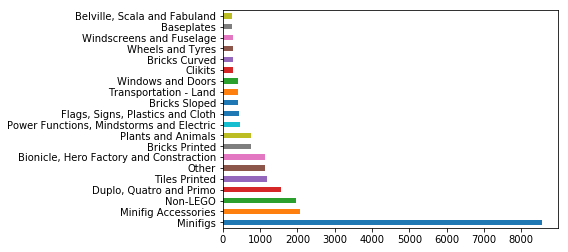

In [12]:
category_counts = parts_per_category['name_category'].value_counts()
top_category_counts = category_counts[:20]
top_category_counts.plot(kind='barh')

**3. Dominant color of each set **

First we need to merge the sets with their list of colors.

In [13]:
inventory_colors = pd.merge(inventory_parts, colors, left_on='color_id', right_index=True)
inventory_colors.drop(columns=['part_id', 'is_spare', 'is_trans'], inplace=True)
inventory_colors.rename(columns={'quantity':'parts_per_inventory'}, inplace=True)

full_inventory_sets = pd.merge(inventory_sets, sets, left_on='set_id', right_index=True)
full_inventory_sets.drop(columns=['theme_id', 'num_parts'], inplace=True)
full_inventory_sets.rename(columns={'quantity':'inventories_per_set'}, inplace=True)

set_color_merge = pd.merge(full_inventory_sets, inventory_colors, left_index=True, right_index=True, 
                          suffixes=['_set', '_color'])
set_color_merge.head()

,set_id,inventories_per_set,name_set,year,color_id,parts_per_inventory,name_color,rgb
inventory_id,,,,,,,,
87,10233-1,1,Horizon Express,2013,9999,1.0,[No Color],05131D
87,88002-1,1,Power Functions Train Motor,2011,9999,1.0,[No Color],05131D
87,8870-1,1,Power Functions Light,2009,9999,1.0,[No Color],05131D
87,8878-1,1,Rechargeable Battery Box,2009,9999,1.0,[No Color],05131D
87,8879-1,1,IR Speed Remote Control,2009,9999,1.0,[No Color],05131D


Number of parts in a set = (number of parts in an inventory) x (number of inventories in a set)

In [14]:
set_color_merge['parts_per_set'] = set_color_merge.inventories_per_set*set_color_merge.parts_per_inventory
set_color_merge.drop(columns=['inventories_per_set', 'parts_per_inventory'], inplace=True)

In [15]:
set_color_group = set_color_merge.groupby(['set_id', 'name_color']).sum()
set_color_group.head(10)

year  color_id  parts_per_set
set_id  name_color                                      
10127-1 Black              2003         0            0.0
        Blue               2003         1            0.0
        Green              2003         2            0.0
        Orange             2003        25            0.0
        Red                2003         4            0.0
        White              4006        30            0.0
        [No Color]        10015     49995            4.0
10173-1 Black              8024         0            7.0
        Dark Bluish Gray   4012       144           16.0
10194-1 [No Color]         2009      9999            1.0

In [16]:
#get dominant color for each set
dominant_color = set_color_group['parts_per_set'].groupby('set_id').idxmax()
dominant_color = dominant_color.apply(lambda x: x[1]).value_counts()

We also want the bars of the graph to be the color that bar is representing. For this, we need to convert the RGB strings given to us into hexadecimal coordinates.

In [17]:
dominant_color_df = pd.DataFrame(dominant_color)
dominant_color_df = pd.merge(dominant_color_df, colors, left_index=True, right_on='name')
dominant_color_df.reset_index(inplace=True)
dominant_color_df.set_index('name', inplace=True)
dominant_color_df.head()

,id,parts_per_set,rgb,is_trans
name,,,,
Royal Blue,89,41,4C61DB,f
[No Color],9999,40,05131D,f
Black,0,36,05131D,f
Unknown,-1,29,0033B2,f
Flat Dark Gold,178,6,B48455,f


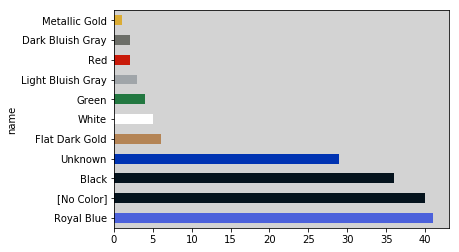

In [18]:
#proper hexadecimal rgb syntax and plot of dominant colors
dominant_color_df['rgb'] = '#' + dominant_color_df['rgb'].astype(str)
dominant_color_plot = dominant_color_df.parts_per_set.plot(kind='barh', color=dominant_color_df['rgb'])

#change background color so we can see white
dominant_color_plot.set_facecolor("lightgray")
dominant_color_plot

**4. Luminance of each set by year **

$luminance = \sqrt{0.299*R^2 + 0.587*G^2 + 0.114*B^2}$

In [19]:
#previously created dataframe
set_color_merge.head()

,set_id,name_set,year,color_id,name_color,rgb,parts_per_set
inventory_id,,,,,,,
87,10233-1,Horizon Express,2013,9999,[No Color],05131D,1.0
87,88002-1,Power Functions Train Motor,2011,9999,[No Color],05131D,1.0
87,8870-1,Power Functions Light,2009,9999,[No Color],05131D,1.0
87,8878-1,Rechargeable Battery Box,2009,9999,[No Color],05131D,1.0
87,8879-1,IR Speed Remote Control,2009,9999,[No Color],05131D,1.0


In [20]:
#calculating luminance

#R, G, B columns
set_color_merge.rgb = set_color_merge.rgb.astype(str)
set_color_merge['R'] = set_color_merge.rgb.str[:2]
set_color_merge['G'] = set_color_merge.rgb.str[2:4]
set_color_merge['B'] = set_color_merge.rgb.str[4:6]

#Transform hex into decimal
set_color_merge['R'] = set_color_merge['R'].apply(lambda x: int(x,16))
set_color_merge['G'] = set_color_merge['G'].apply(lambda x: int(x,16))
set_color_merge['B'] = set_color_merge['B'].apply(lambda x: int(x,16))

set_color_merge['luminance'] = sqrt(0.299*(set_color_merge.R*set_color_merge.R)
                                    +0.587*(set_color_merge.G*set_color_merge.G)
                                    +0.114*(set_color_merge.B*set_color_merge.B))
set_color_merge[200:210]

,set_id,name_set,year,color_id,name_color,rgb,parts_per_set,R,G,B,luminance
inventory_id,,,,,,,,,,,
8348,7907-19,Advent Calendar 2007 City (Day 18) Signal Mast,2007,14,Yellow,F2CD37,1.0,242,205,55,206.213872
8348,7907-19,Advent Calendar 2007 City (Day 18) Signal Mast,2007,73,Medium Blue,5A93DB,1.0,90,147,219,143.436177
8348,7907-2,Advent Calendar 2007 City (Day 1) Firefighter...,2007,0,Black,05131D,1.0,5,19,29,17.755450
8348,7907-2,Advent Calendar 2007 City (Day 1) Firefighter...,2007,1,Blue,0055BF,1.0,0,85,191,91.651017
8348,7907-2,Advent Calendar 2007 City (Day 1) Firefighter...,2007,14,Yellow,F2CD37,1.0,242,205,55,206.213872
8348,7907-2,Advent Calendar 2007 City (Day 1) Firefighter...,2007,73,Medium Blue,5A93DB,1.0,90,147,219,143.436177
8348,7907-20,Advent Calendar 2007 City (Day 19) Sanitary En...,2007,0,Black,05131D,1.0,5,19,29,17.755450
8348,7907-20,Advent Calendar 2007 City (Day 19) Sanitary En...,2007,1,Blue,0055BF,1.0,0,85,191,91.651017
8348,7907-20,Advent Calendar 2007 City (Day 19) Sanitary En...,2007,14,Yellow,F2CD37,1.0,242,205,55,206.213872


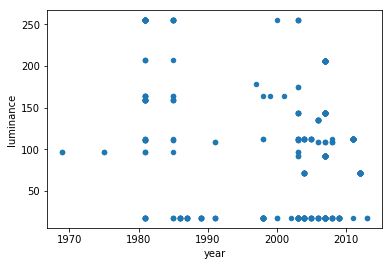

In [21]:
set_color_merge.plot('year', 'luminance', kind='scatter')

From 1980, there seems to be a much wider range of luminance. We assume that this is a point where they began to try out many new colors.

## Task B. Drop the bike

*Los Angeles Metro* has been sharing publicly [anonymized *Metro Bike Share* trip data](https://bikeshare.metro.net/about/data/) under the [Open Database License (ODbL)](http://opendatacommons.org/licenses/odbl/1.0/).

In this task you will again perform data wrangling and interpretation.

### B1. Loading phase
Load the json file into a `DataFrame`.


In [22]:
BIKES_DATA_FOLDER = DATA_FOLDER + '/bikes'

In [23]:
bikes = pd.read_json(BIKES_DATA_FOLDER+'/metro-bike-share-trip-data.json.zip')

### B2. Cleaning phase
Describe the type and the value range of each attribute. Indicate and transform the attributes that are `Categorical`. Are there redundant columns in the dataset (i.e., are there columns whose value depends only on the value of another column)? What are the possible pitfalls of having such columns? Reduce *data redundancy* by extracting such columns to separate `DataFrames`. Which of the two formats (the initial one or the one with reduced data redundancy) is more susceptible to inconsistencies? At the end print for each `Dataframe` the *type of each column* and it's *shape*.

In [24]:
#the column names should have underscores rather than spaces
bikes.columns = [c.replace(' ', '_') for c in bikes.columns]

bikes.head()

,Bike_ID,Duration,End_Time,Ending_Station_ID,Ending_Station_Latitude,Ending_Station_Longitude,Passholder_Type,Plan_Duration,Start_Time,Starting_Station_ID,Starting_Station_Latitude,Starting_Station_Longitude,Trip_ID,Trip_Route_Category
0,6281.0,180,2016-07-07T04:20:00,3014.0,34.056610,-118.23721,Monthly Pass,30.0,2016-07-07T04:17:00,3014.0,34.056610,-118.23721,1912818,Round Trip
1,6281.0,1980,2016-07-07T06:33:00,3014.0,34.056610,-118.23721,Monthly Pass,30.0,2016-07-07T06:00:00,3014.0,34.056610,-118.23721,1919661,Round Trip
2,5861.0,300,2016-07-07T10:37:00,3016.0,34.052898,-118.24156,Flex Pass,365.0,2016-07-07T10:32:00,3016.0,34.052898,-118.24156,1933383,Round Trip
3,5861.0,10860,2016-07-07T13:38:00,3016.0,34.052898,-118.24156,Flex Pass,365.0,2016-07-07T10:37:00,3016.0,34.052898,-118.24156,1944197,Round Trip
4,6674.0,420,2016-07-07T12:58:00,3032.0,34.049889,-118.25588,Walk-up,0.0,2016-07-07T12:51:00,3032.0,34.049889,-118.25588,1940317,Round Trip


In [25]:
bikes.dtypes

Bike_ID                       float64
Duration                        int64
End_Time                       object
Ending_Station_ID             float64
Ending_Station_Latitude       float64
Ending_Station_Longitude      float64
Passholder_Type                object
Plan_Duration                 float64
Start_Time                     object
Starting_Station_ID           float64
Starting_Station_Latitude     float64
Starting_Station_Longitude    float64
Trip_ID                         int64
Trip_Route_Category            object
dtype: object

We see no reason to transform categorical values since they are already in string format after having imported the data.

A first glance at the min and max values for each attribute shows us that both longitude and latitude have 0.0 values (probably replacing unknowns). We would rather convert these into NaN values so we can have some valid statistics.

In [26]:
bikes.loc[bikes['Ending_Station_Latitude'] == 0.0] = np.nan
bikes.loc[bikes['Ending_Station_Longitude'] == 0.0] = np.nan
bikes.loc[bikes['Starting_Station_Latitude'] == 0.0] = np.nan
bikes.loc[bikes['Starting_Station_Longitude'] == 0.0] = np.nan

In [27]:
bikes.describe()

,Bike_ID,Duration,Ending_Station_ID,Ending_Station_Latitude,Ending_Station_Longitude,Plan_Duration,Starting_Station_ID,Starting_Station_Latitude,Starting_Station_Longitude,Trip_ID
count,132357.000000,132367.000000,132271.000000,131316.000000,131316.000000,131601.000000,132348.000000,132319.000000,132319.000000,1.323670e+05
mean,6193.625868,1554.955389,3042.000174,34.047054,-118.249846,44.828231,3042.760744,34.047539,-118.250119,1.153309e+07
std,293.628734,5814.881470,38.010906,0.006295,0.012057,90.426658,33.921949,0.006374,0.011563,6.369207e+06
min,1349.000000,60.000000,3000.000000,33.987381,-118.472832,0.000000,3000.000000,33.987381,-118.472832,1.912818e+06
25%,5953.000000,360.000000,3022.000000,34.044159,-118.256981,0.000000,3024.000000,34.044170,-118.256980,5.060840e+06
50%,6186.000000,600.000000,3038.000000,34.046810,-118.250954,30.000000,3040.000000,34.046822,-118.250954,1.044344e+07
75%,6434.000000,1080.000000,3063.000000,34.050480,-118.238810,30.000000,3063.000000,34.050880,-118.241562,1.720879e+07
max,6728.000000,86400.000000,4108.000000,34.064281,-118.231277,365.000000,4108.000000,34.064281,-118.231277,2.379422e+07


Redundant columns:

Duration is redundant with end and start times; we can remove End_Time from the dataframe and still have the necessary information.

Longitudes and latitudes are unncessary since we have the start and end station IDs. These columns aren't really redundant, but we have no reason to keep them in the original dataset, so we'll set them aside.

The route category is also redundant, since we can tell if a trip was round trip based on the starting and ending station IDs.

In [28]:
#Trip ID is placed into the dataframe of redundant columns so we can still link these values to a given trip
redundant_columns = pd.DataFrame(data={'Trip_ID':bikes.Trip_ID, 'End_Time':bikes.End_Time, 
                                       'End_Latitude':bikes.Ending_Station_Latitude, 
                                       'End_Longitude':bikes.Ending_Station_Longitude, 
                                       'Start_Latitude':bikes.Starting_Station_Latitude, 
                                       'Start_Longitude':bikes.Starting_Station_Longitude, 
                                       'Trip_Category':bikes.Trip_Route_Category})
bikes.drop(columns=['End_Time', 'Ending_Station_Latitude', 'Ending_Station_Longitude', 'Starting_Station_Latitude', 
                   'Starting_Station_Longitude', 'Trip_Route_Category'], inplace=True)
bikes.head()

,Bike_ID,Duration,Ending_Station_ID,Passholder_Type,Plan_Duration,Start_Time,Starting_Station_ID,Trip_ID
0,6281.0,180.0,3014.0,Monthly Pass,30.0,2016-07-07T04:17:00,3014.0,1912818.0
1,6281.0,1980.0,3014.0,Monthly Pass,30.0,2016-07-07T06:00:00,3014.0,1919661.0
2,5861.0,300.0,3016.0,Flex Pass,365.0,2016-07-07T10:32:00,3016.0,1933383.0
3,5861.0,10860.0,3016.0,Flex Pass,365.0,2016-07-07T10:37:00,3016.0,1944197.0
4,6674.0,420.0,3032.0,Walk-up,0.0,2016-07-07T12:51:00,3032.0,1940317.0


Redundant columns can be dangerous, since if one of two related columns is modified, the other isn't necessarily, and we can end up with contradictory data. The reduced format without redundant columns is much more stable.

In [29]:
print(bikes.shape)
print(redundant_columns.shape)

(132427, 8)
(132427, 7)


In [30]:
bikes.dtypes

Bike_ID                float64
Duration               float64
Ending_Station_ID      float64
Passholder_Type         object
Plan_Duration          float64
Start_Time              object
Starting_Station_ID    float64
Trip_ID                float64
dtype: object

In [31]:
redundant_columns.dtypes

Trip_ID            float64
End_Time            object
End_Latitude       float64
End_Longitude      float64
Start_Latitude     float64
Start_Longitude    float64
Trip_Category       object
dtype: object

### B3. Querying phase
Answer the following queries using the functionality of `Pandas`.

1. Plot the *distribution* of the number of outgoing trips from each station in a histogram with 20 bins (Hint: each bin describes a range of counts, not stations).
* Plot histograms for the *duration* and *trip starting hour in the day* attributes. For both the *duration*  and the *trip starting hour* use *discrete 1-hour intervals*. What do you observe in each plot? What are some popular values in the *duration* plot? Explain the local maxima and the trends you observe on the *trip starting hour* plot based on human behavior.
* For each *trip route category*, calculate the proportion of trips by *passholder type* and present your results in *a stacked bar chart with normalized height*.
* Considering only trips that begin in the morning hours (before noon), plot in *a single bar chart* the proportion of trips by *passholder type* and *trip route category*. Explain any outliers you observe.
* Separate the hours of the day into two intervals that have (approximately) the same number of bikes leaving the stations. For each of the two intervals calculate the proportion of trips by *passholder type* and *trip route category*. Present your results in a `DataFrame` which has a unique, non-composite index. Does the proportion of trips depend on whether it is the first or second hour interval? Would the company have any significant benefit by creating a more complex paying scheme where monthly pass users would pay less in the first interval and (equally) more on the second one? Assume that the number of trips per interval will not change if the scheme changes.

**1. Outgoing trips per station **

We'd like to sum the number of starting station IDs

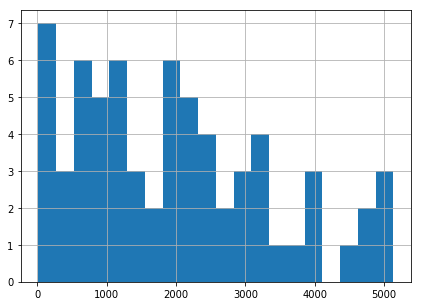

In [32]:
outgoing_trips = bikes['Starting_Station_ID'].value_counts()
plt.figure(figsize=(7,5))
outgoing_trips.hist(bins=20)

**2. Histograms for trip duration and starting hour **

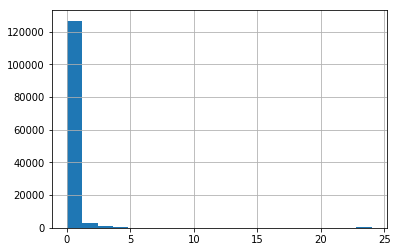

In [33]:
#Conversion to hour before plotting
duration_h = bikes['Duration'] / (60*60)
duration_h.hist(bins=20)

The vast majority of trips last less than an hour

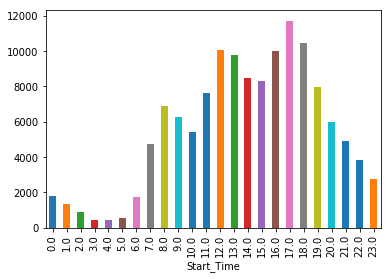

In [34]:
start_time = bikes['Start_Time'].astype('datetime64')
start_time.groupby(start_time.dt.hour).count().plot(kind='bar')

Local maxima appear around 8:00, 12-13:00, and 17:00. These are all times when people are commonly in transit; to go to work, to go out to lunch, and to return home at the end of the day.

**3. Proportion of trips by passholder type, for each route category, as a stacked bar chart. **

In [35]:
bikes['Trip_Category'] = redundant_columns['Trip_Category']

In [36]:
one_way = bikes.where(bikes.Trip_Category == 'One Way')
one_way.dropna(inplace=True)
one_way_passholders = one_way.groupby('Passholder_Type').count()
one_way_passholders.reset_index(drop=False, inplace=True)
one_way_passholders

,Passholder_Type,Bike_ID,Duration,Ending_Station_ID,Plan_Duration,Start_Time,Starting_Station_ID,Trip_ID,Trip_Category
0,Flex Pass,9030,9030,9030,9030,9030,9030,9030,9030
1,Monthly Pass,77152,77152,77152,77152,77152,77152,77152,77152
2,Walk-up,32747,32747,32747,32747,32747,32747,32747,32747


In [37]:
round_trip = bikes.where(bikes.Trip_Category == 'Round Trip')
round_trip.dropna(inplace=True)
round_trip_passholders = round_trip.groupby('Passholder_Type').count()
round_trip_passholders.reset_index(drop=False, inplace=True)
round_trip_passholders

,Passholder_Type,Bike_ID,Duration,Ending_Station_ID,Plan_Duration,Start_Time,Starting_Station_ID,Trip_ID,Trip_Category
0,Flex Pass,483,483,483,483,483,483,483,483
1,Monthly Pass,3690,3690,3690,3690,3690,3690,3690,3690
2,Walk-up,8439,8439,8439,8439,8439,8439,8439,8439


In [38]:
passholders = pd.DataFrame()
passholders = passholders.append(one_way_passholders['Trip_Category'], ignore_index=True)
passholders = passholders.append(round_trip_passholders['Trip_Category'], ignore_index=True)
#passholders = passholders.transpose()
#passholders.set_index(['One Way', 'Round Trip'], inplace=True)
passholders.rename(index={0:'One Way', 1:'Round Trip'},
                   columns={0:'Flex Pass', 1:'Monthly Pass', 2:'Walk-up'}, inplace=True)

In [39]:
passholders

,Flex Pass,Monthly Pass,Walk-up
One Way,9030.0,77152.0,32747.0
Round Trip,483.0,3690.0,8439.0


Text(0.5,1,'Normalized graph of types of passes per type of trip')

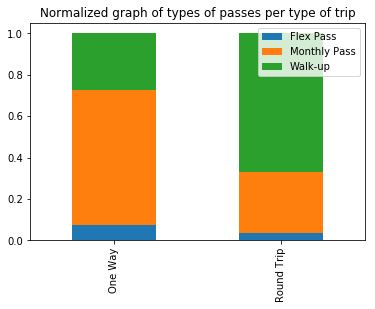

In [40]:
passholders = passholders.div(passholders.sum(axis=1), axis=0)
passholders.plot(kind='bar', stacked=True)
pyplot.title('Normalized graph of types of passes per type of trip')

Round trips are frequently walk-ups, while one-way trips are primarily taken on monthly passes.

There is actually a third type of pass: the staff annual, but the type of trip taken with these passes is undefined so they were removed from the passholders dataframe when we dropped rows with NaN values.

**4. For morning trips, plot the proportion of trips by passholder type and route category. **

First we want to extract only trips that start before noon.

In [41]:
#Trip information for trips starting between 0:00 and 12:00
morning = pd.to_datetime(bikes["Start_Time"])
morning = bikes[(morning.dt.hour>0) & (morning.dt.hour<12)]

The following instructions are so unclear that I have no idea what sort of graph is expected. The sentance has no meaning. Perhaps we would like bar graphs with the number of trips per passholder type, and another similar graph with trips per route category. Why we could want these on the same graph is an entirely different question.

In [42]:
#number of trips per passholder type
morning_passholders = morning.Passholder_Type.value_counts()
morning_passholders

Monthly Pass    24890
Walk-up          8676
Flex Pass        2675
Staff Annual      133
Name: Passholder_Type, dtype: int64

In [43]:
#number of trips per route category
morning_trips = morning.Trip_Category.value_counts()
morning_trips

One Way       33315
Round Trip     3059
Name: Trip_Category, dtype: int64

Text(0.5,1,'Proportion of morning trips by type of pass')

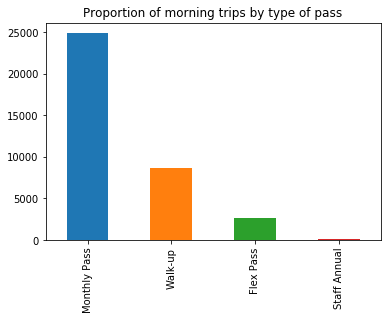

In [44]:
morning_passholders.plot(kind='bar')
pyplot.title('Proportion of morning trips by type of pass')

Text(0.5,1,'Proportion of morning trips by type')

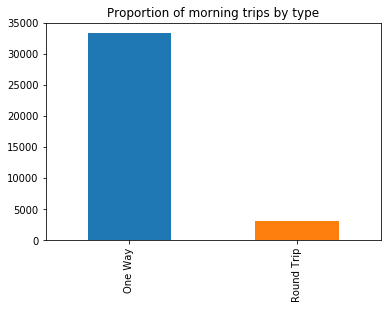

In [45]:
morning_trips.plot(kind='bar')
pyplot.title('Proportion of morning trips by type')

Most trips are one-way, occuring with a monthly pass. This is perfectly reasonable since the majority of trips will be taken to work.

**5. Calculate proportion of trips as before in two intervals with the same number of bikes leaving the station **

The data must be separated into two sets, based on time of day, with approximately the same number of bikes leaving the station. For each interval we'll calculate the proportion of trips by passholder type and trip route category. The resultant dataframe should have a unique index.
We wonder if the proportion of trips depends on the time interval. Would the company have any significant benefit by creating a more complex paying scheme where monthly pass users would pay less in the first interval and (equally) more on the second one? Assume that the number of trips per interval will not change if the scheme changes.

In [46]:
bikes['Start_Time'] = bikes['Start_Time'].astype("datetime64")

In [47]:
mean(bikes.Start_Time.dt.hour)

14.070319641602515

In [48]:
interval1 = bikes[(bikes.Start_Time.dt.hour>0) & (bikes.Start_Time.dt.hour<14)]
interval2 = bikes[(bikes.Start_Time.dt.hour<24) & (bikes.Start_Time.dt.hour>=14)]

In [49]:
interval1.set_index(interval1.Trip_ID)
interval1.index.is_unique

True

In [73]:
interval2.set_index(interval2.Trip_ID)
interval2.index.is_unique

True

Text(0.5,1,'Proportion of trips by category for two time intervals')

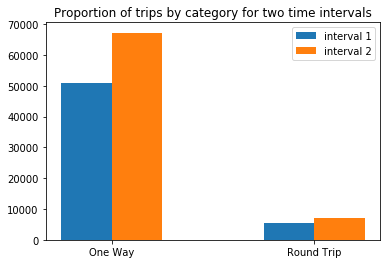

In [77]:
index = np.arange(2)
bar_width=0.25
interval1_trips = interval1.Trip_Category.value_counts()
interval2_trips = interval2.Trip_Category.value_counts()

fig, ax = plt.subplots()

plt.bar(index, interval1_trips, bar_width, label='interval 1')
plt.bar(index+bar_width, interval2_trips, bar_width, label='interval 2')

ax.set_xticks(index + bar_width/2)
ax.set_xticklabels(('One Way', 'Round Trip'))
ax.legend()
plt.title('Proportion of trips by category for two time intervals')

Text(0.5,1,'Proportion of trips by pass for two time intervals')

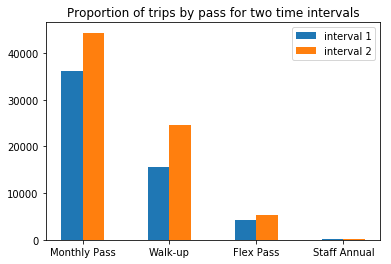

In [80]:
index = np.arange(4)
bar_width=0.25
interval1_passes = interval1.Passholder_Type.value_counts()
interval2_passes = interval2.Passholder_Type.value_counts()

fig, ax = plt.subplots()

plt.bar(index, interval1_passes, bar_width, label='interval 1')
plt.bar(index+bar_width, interval2_passes, bar_width, label='interval 2')

ax.set_xticks(index + bar_width/2)
ax.set_xticklabels(('Monthly Pass', 'Walk-up', 'Flex Pass', 'Staff Annual'))
ax.legend()
plt.title('Proportion of trips by pass for two time intervals')

There are more trips taken in the second time interval (after 14:00). Monthly users would have no reason to pay more in the second interval rather than the first since they would end up paying more than with the current scheme.